# Médias Móveis Exemplo 

In [2]:
# Aqui iremos fazer a média móvel dos dados no arquivo Air passenger

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
from datetime import datetime


In [3]:
# como os dados da tabela posuem data no formato Mês/Ano, precisamos primeiramente passar uma mascara para que estes sejam lidos pelo datetime

dateparse= lambda dates: datetime.strptime(dates, '%Y-%m')
data=pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dateparse)


C:\Users\vitnasci\AppData\Local\Temp\ipykernel_16608\147985704.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data=pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dateparse)


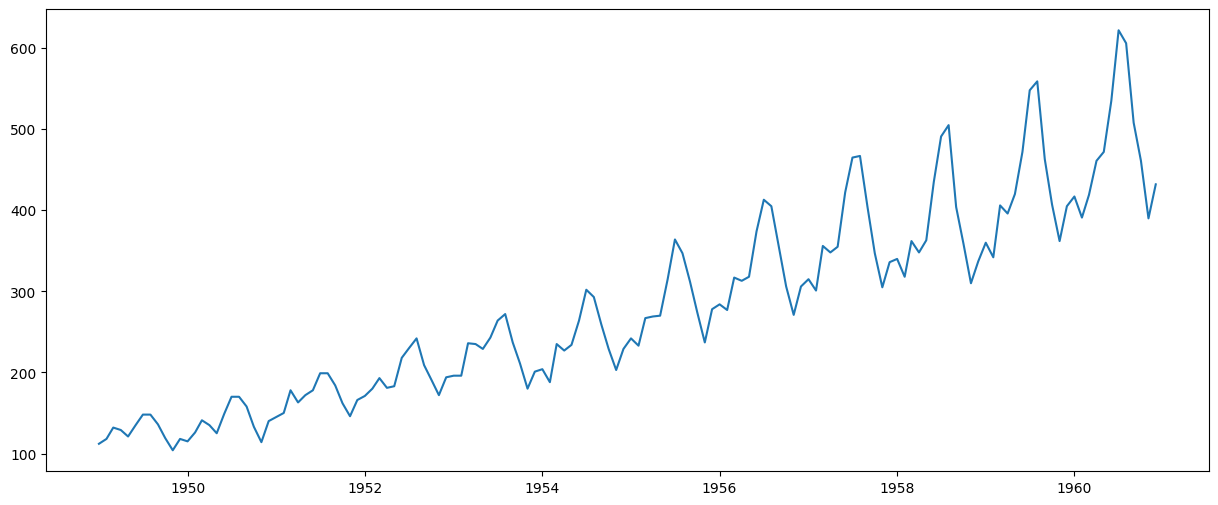

In [5]:
plt.plot(data)
plt.show()

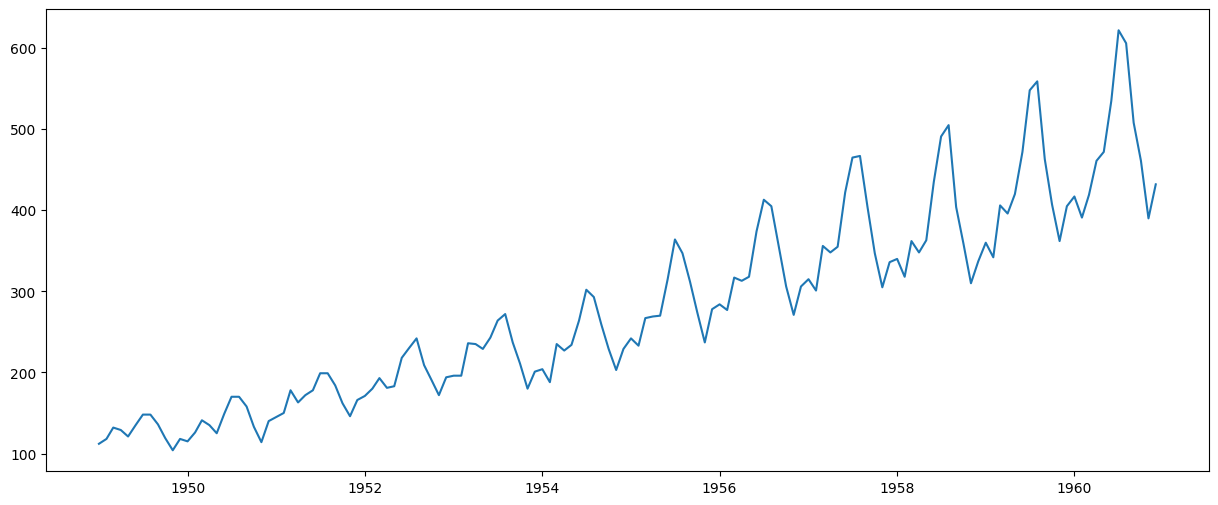

In [6]:
plt.plot(data)
plt.show()

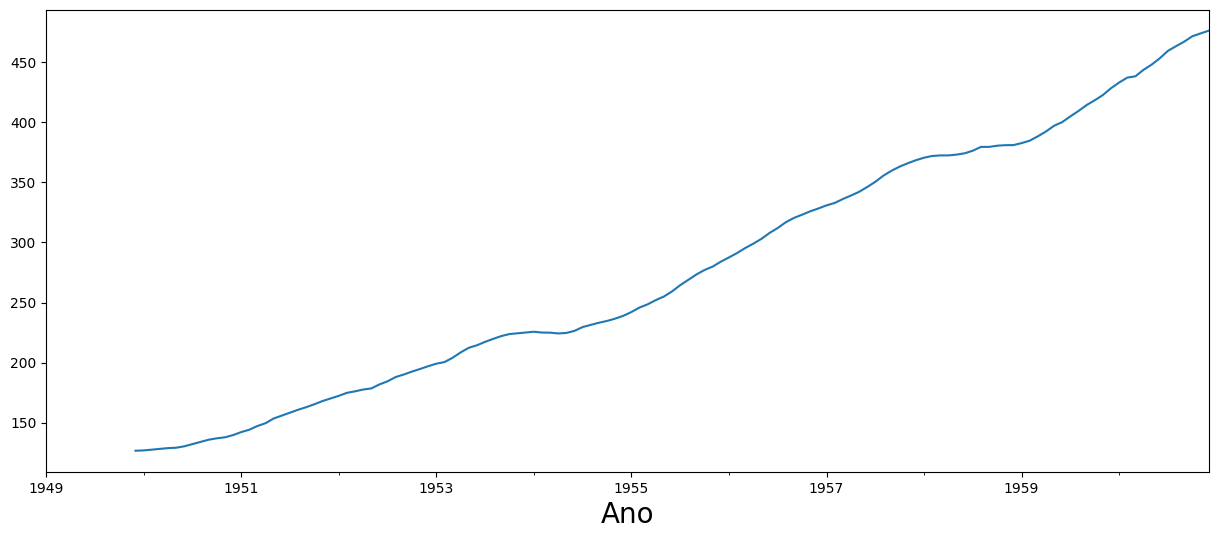

In [ ]:
# Aqui eu uso a funcao rolling para determinar o intervalo em que a média móvel sera feita
p=data['#Passengers']
p.rolling(12).mean().plot()
plt.xlabel('Ano',fontsize=20)
plt.show()

# Previsão com média móvel


In [ ]:
# Aqui o objetivo é criar uma previsão para cada uma das médias móveis de um dia adiante dos dados do AirPassenger.csv.
#Por exemplo, para cada dado de tempo é feita uma previsão do dia em questão +1
# Para isto devemos encontrar a média móvel que produz menos mse 

#melhor configuração
optimal_n = None
#melhor mse
best_mse = None

db = data[['#Passengers']].values.astype('float32')


mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))

#tentando de 3 até metade mais 1
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n) 
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)

print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Melhor MSE = %s" % best_mse)
print("Otimo n = %s" % optimal_n)

forecast = np.zeros(len(db) + 1) 
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])

plt.plot(db[:, 0],label = 'Dados Originais')
plt.plot(forecast, label = 'Previsão')
plt.legend()
plt.show()